In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("marketing_customer_analysis.csv")
df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [4]:
df.describe()

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [5]:
df.columns


Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [6]:
df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [7]:
df.isna().sum()

Unnamed: 0                          0
Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           633
Months Since Policy Inception       0
Number of Open Complaints         633
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64

In [8]:
df['Months Since Last Claim'].fillna(df['Months Since Last Claim'].mean(), inplace=True)

In [9]:
df['Number of Open Complaints'].fillna(df['Number of Open Complaints'].mean(), inplace=True)

In [10]:
df['Total Claim Amount'].fillna(df['Total Claim Amount'].mean(), inplace=True)

In [11]:
df['State'].fillna('State', inplace=True)

In [12]:
df['Response'].fillna('Response', inplace=True)

In [13]:
df['Vehicle Class'].fillna('Vehicle Class', inplace=True)

In [14]:
df['Vehicle Size'].fillna('Vehicle Size', inplace=True)

In [15]:
df['Vehicle Type'].fillna('Vehicle Type', inplace=True)

In [16]:
df.isna().sum()

Unnamed: 0                       0
Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Vehicle Type                     0
dtype: int64

In [17]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Vehicle Type
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Vehicle Type
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Vehicle Type
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,0.384256,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,Vehicle Type
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.000000,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [18]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,6885.081434,30359.195670,34.442532,9.783520,27.940675,0.885589,2.399359,292.180556
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527
50%,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.384256,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [19]:
for col in ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Policy Inception', 'Total Claim Amount']:
    df[col] = np.where(df[col] > 0, df[col], df[col].mean())


In [20]:
xt, lambda_value = stats.boxcox(df[col])


In [21]:
response_number= df['Response'].value_counts()
response_number

Response
No          8813
Yes         1466
Response     631
Name: count, dtype: int64

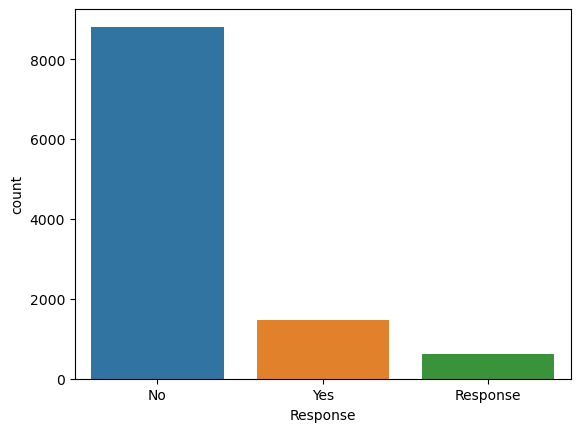

In [22]:
sns.countplot(x="Response" , data=df)
plt.show()

<Axes: xlabel='Response', ylabel='count'>

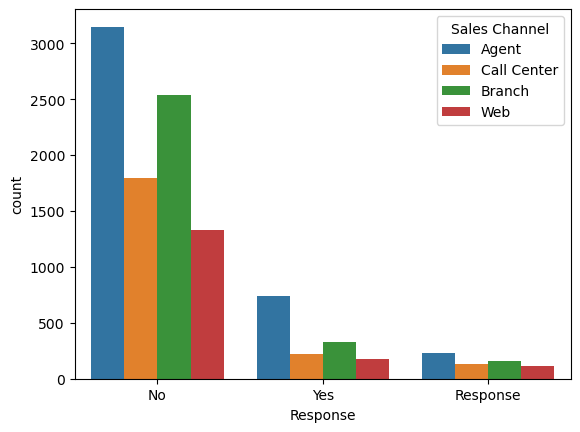

In [23]:
sns.countplot(x="Response", hue="Sales Channel" , data = df)

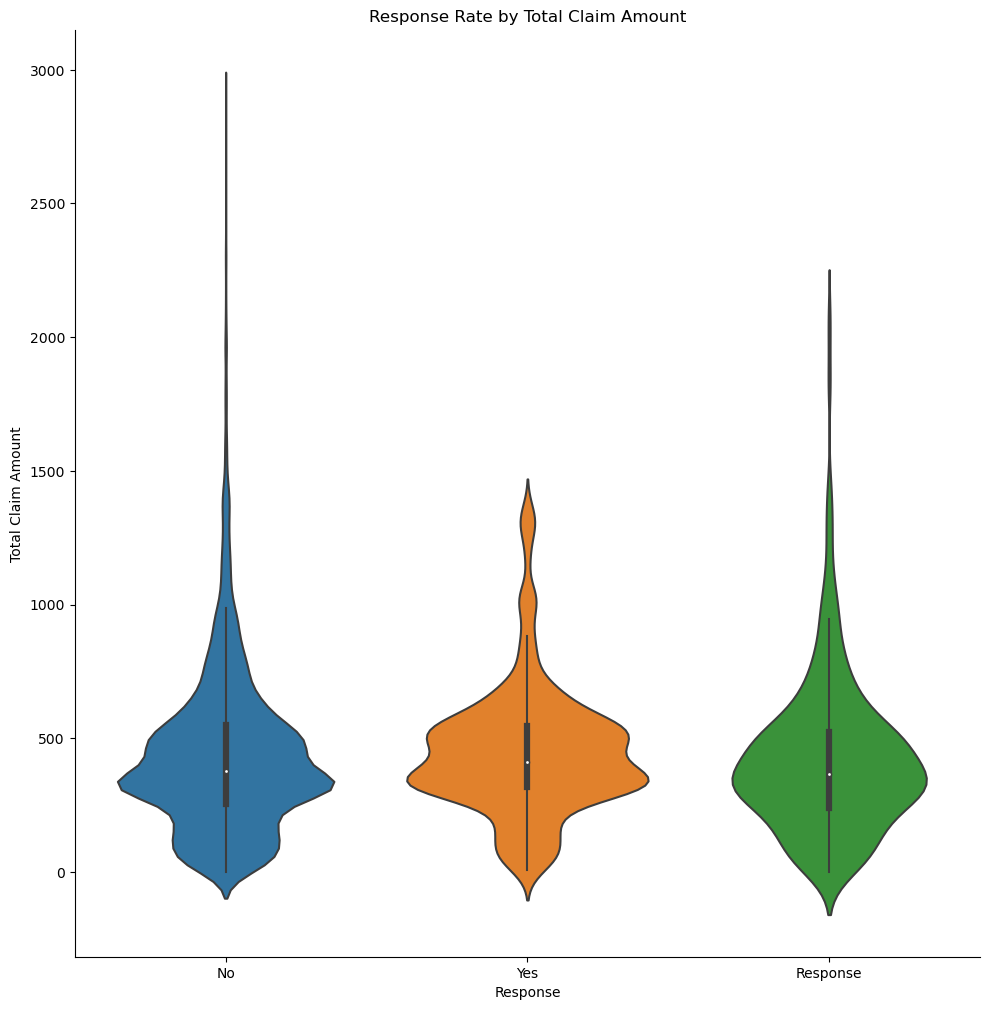

In [24]:
sns.catplot(x='Response', y='Total Claim Amount', data=df, kind="violin",height = 10)
plt.title('Response Rate by Total Claim Amount')
plt.xlabel('Response')
plt.ylabel('Total Claim Amount')
plt.show()

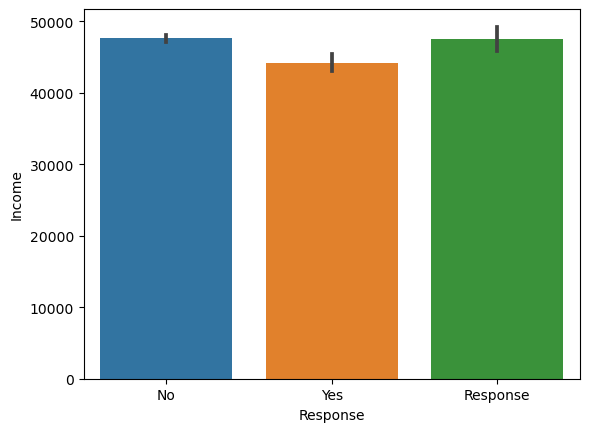

In [25]:

sns.barplot(x='Response', y='Income', data=df)
plt.show()

In [26]:
numerical = df.select_dtypes(include=np.number)
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,4809.216960,48029.000000,61.0,7.000000,52.0,0.000000,9,292.800000
1,2228.525238,37536.284785,64.0,3.000000,26.0,0.000000,1,744.924331
2,14947.917300,22139.000000,100.0,34.000000,31.0,0.000000,2,480.000000
3,22332.439460,49078.000000,97.0,10.000000,3.0,0.000000,2,484.013411
4,9025.067525,23675.000000,117.0,15.149071,31.0,0.384256,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,37536.284785,253.0,15.149071,40.0,0.384256,7,1214.400000
10906,5259.444853,61146.000000,65.0,7.000000,68.0,0.000000,6,273.018929
10907,23893.304100,39837.000000,201.0,11.000000,63.0,0.000000,2,381.306996
10908,11971.977650,64195.000000,158.0,0.000000,27.0,4.000000,6,618.288849


In [27]:
numerical.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.013773,0.403069,0.015683,0.014839,-0.031501,0.016024,0.232626
Income,0.013773,1.000000,-0.006235,-0.026068,0.003468,0.011843,-0.004954,-0.244572
Monthly Premium Auto,0.403069,-0.006235,1.000000,0.008504,0.018721,-0.010066,-0.020505,0.631799
Months Since Last Claim,0.015683,-0.026068,0.008504,1.000000,-0.038360,0.002246,0.007425,0.012728
Months Since Policy Inception,0.014839,0.003468,0.018721,-0.038360,1.000000,0.002203,-0.005641,0.003581
Number of Open Complaints,-0.031501,0.011843,-0.010066,0.002246,0.002203,1.000000,0.003964,-0.011025
Number of Policies,0.016024,-0.004954,-0.020505,0.007425,-0.005641,0.003964,1.000000,-0.008923
Total Claim Amount,0.232626,-0.244572,0.631799,0.012728,0.003581,-0.011025,-0.008923,1.000000


In [28]:
categoricals = df.select_dtypes(include = object)
categoricals = categoricals.drop(columns=['Customer','Effective To Date'])
categoricals


,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,Vehicle Type
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,Vehicle Type
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,Vehicle Type
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,Vehicle Type
10908,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [29]:
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,4809.216960,48029.000000,61.0,7.000000,52.0,0.000000,9,292.800000
1,2228.525238,37536.284785,64.0,3.000000,26.0,0.000000,1,744.924331
2,14947.917300,22139.000000,100.0,34.000000,31.0,0.000000,2,480.000000
3,22332.439460,49078.000000,97.0,10.000000,3.0,0.000000,2,484.013411
4,9025.067525,23675.000000,117.0,15.149071,31.0,0.384256,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,37536.284785,253.0,15.149071,40.0,0.384256,7,1214.400000
10906,5259.444853,61146.000000,65.0,7.000000,68.0,0.000000,6,273.018929
10907,23893.304100,39837.000000,201.0,11.000000,63.0,0.000000,2,381.306996
10908,11971.977650,64195.000000,158.0,0.000000,27.0,4.000000,6,618.288849


In [30]:
numerical.shape

(10910, 8)

In [31]:
numerical.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.013773,0.403069,0.015683,0.014839,-0.031501,0.016024,0.232626
Income,0.013773,1.000000,-0.006235,-0.026068,0.003468,0.011843,-0.004954,-0.244572
Monthly Premium Auto,0.403069,-0.006235,1.000000,0.008504,0.018721,-0.010066,-0.020505,0.631799
Months Since Last Claim,0.015683,-0.026068,0.008504,1.000000,-0.038360,0.002246,0.007425,0.012728
Months Since Policy Inception,0.014839,0.003468,0.018721,-0.038360,1.000000,0.002203,-0.005641,0.003581
Number of Open Complaints,-0.031501,0.011843,-0.010066,0.002246,0.002203,1.000000,0.003964,-0.011025
Number of Policies,0.016024,-0.004954,-0.020505,0.007425,-0.005641,0.003964,1.000000,-0.008923
Total Claim Amount,0.232626,-0.244572,0.631799,0.012728,0.003581,-0.011025,-0.008923,1.000000


Customer Lifetime Value


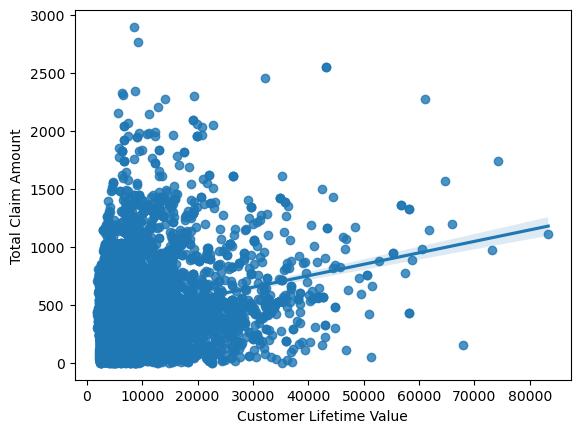

Monthly Premium Auto


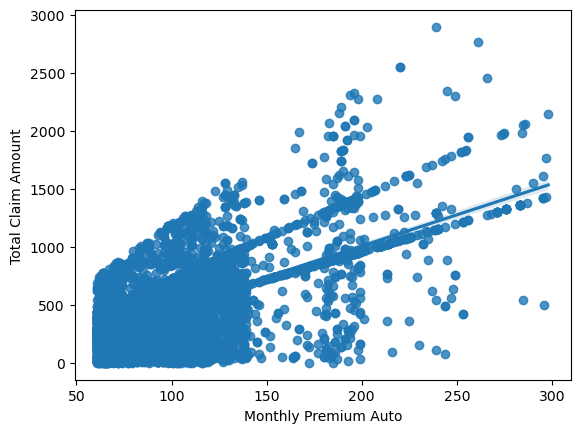

Months Since Last Claim


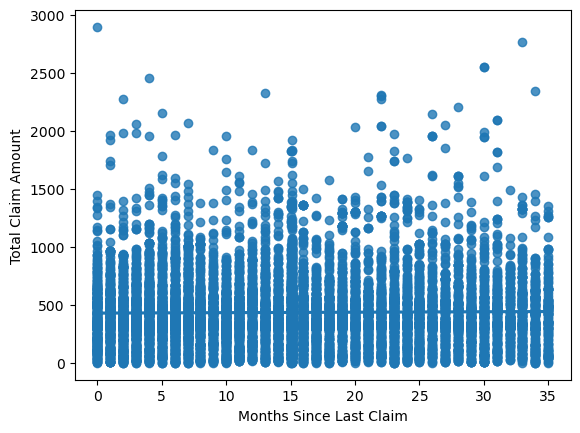

Months Since Policy Inception


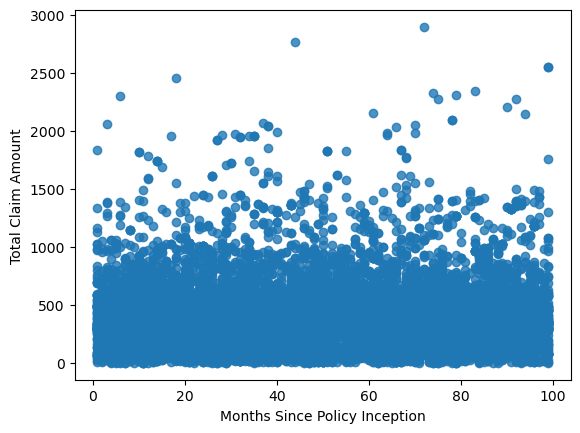

Number of Open Complaints


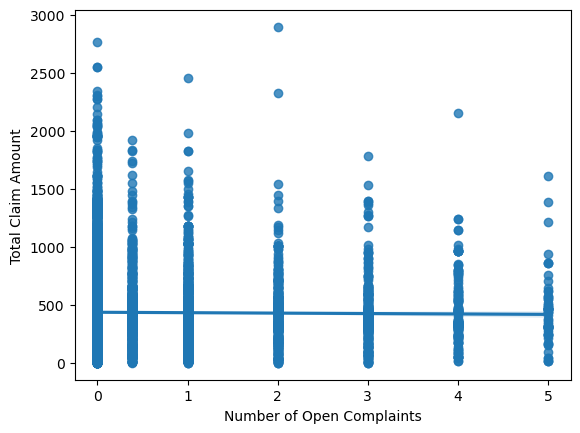

Number of Policies


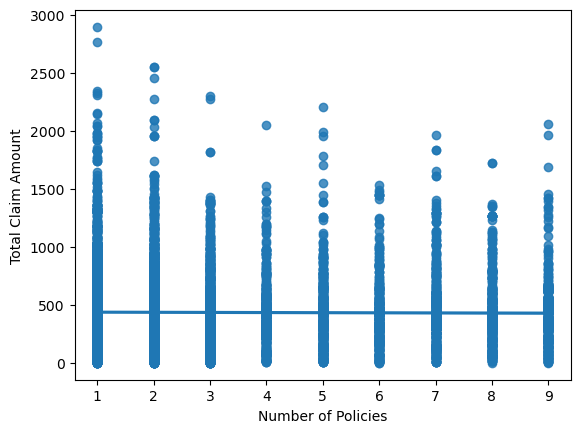

Income


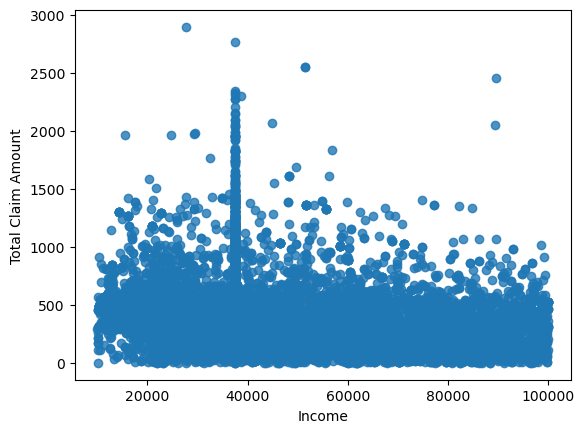

In [32]:
for column in ['Customer Lifetime Value',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies','Income' ]:
    print(column)
    sns.regplot(data = df , x= column, y= "Total Claim Amount")
    plt.show()

In [33]:
Q1= numerical.quantile(0.25)
Q3= numerical.quantile(0.75)
IQR = Q3 - Q1

x1 = numerical[(numerical > Q1 - 1.5 * IQR) & (numerical < Q3 + 1.5 * IQR)]

In [34]:
x1 = pd.get_dummies(x1, drop_first =True)
x1

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,4809.216960,48029.000000,61.0,7.000000,52.0,0.000000,NaN,292.800000
1,2228.525238,37536.284785,64.0,3.000000,26.0,0.000000,1.0,744.924331
2,14947.917300,22139.000000,100.0,34.000000,31.0,0.000000,2.0,480.000000
3,NaN,49078.000000,97.0,10.000000,3.0,0.000000,2.0,484.013411
4,9025.067525,23675.000000,117.0,15.149071,31.0,0.384256,7.0,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,37536.284785,NaN,15.149071,40.0,0.384256,7.0,NaN
10906,5259.444853,61146.000000,65.0,7.000000,68.0,0.000000,6.0,273.018929
10907,NaN,39837.000000,NaN,11.000000,63.0,0.000000,2.0,381.306996
10908,11971.977650,64195.000000,158.0,0.000000,27.0,NaN,6.0,618.288849


In [35]:
x1.isna().sum()

Customer Lifetime Value           984
Income                              0
Monthly Premium Auto              517
Months Since Last Claim             0
Months Since Policy Inception       0
Number of Open Complaints        2117
Number of Policies                505
Total Claim Amount                556
dtype: int64

In [36]:
x1  = x1.drop(columns=['Number of Open Complaints'])
x1 = x1.fillna(x1.mean())
x1.isna().sum()

Customer Lifetime Value          0
Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Policies               0
Total Claim Amount               0
dtype: int64

In [37]:
for col in categoricals.columns:
   x1[col] = df[col]
x1

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount,State,Response,Coverage,...,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,4809.216960,48029.000000,61.000000,7.000000,52.0,2.686977,292.800000,Arizona,No,Basic,...,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,Vehicle Type
1,2228.525238,37536.284785,64.000000,3.000000,26.0,1.000000,744.924331,California,No,Basic,...,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,Vehicle Type
2,14947.917300,22139.000000,100.000000,34.000000,31.0,2.000000,480.000000,Washington,No,Basic,...,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,6279.921873,49078.000000,97.000000,10.000000,3.0,2.000000,484.013411,Oregon,Yes,Extended,...,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,9025.067525,23675.000000,117.000000,15.149071,31.0,7.000000,707.925645,Oregon,No,Premium,...,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,Vehicle Type
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,37536.284785,87.540171,15.149071,40.0,7.000000,389.515802,Nevada,No,Premium,...,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,5259.444853,61146.000000,65.000000,7.000000,68.0,6.000000,273.018929,Oregon,No,Basic,...,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,6279.921873,39837.000000,87.540171,11.000000,63.0,2.000000,381.306996,Arizona,No,Extended,...,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,Vehicle Type
10908,11971.977650,64195.000000,158.000000,0.000000,27.0,6.000000,618.288849,California,No,Premium,...,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [38]:
y = x1['Total Claim Amount']
x = x1.drop(columns = "Total Claim Amount")

In [39]:
y.isna().sum()

0

In [40]:
x = pd.get_dummies(x,drop_first =True)
x

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,State_California,State_Nevada,State_Oregon,State_State,...,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Class_Vehicle Class,Vehicle Size_Medsize,Vehicle Size_Small,Vehicle Size_Vehicle Size,Vehicle Type_Vehicle Type
0,4809.216960,48029.000000,61.000000,7.000000,52.0,2.686977,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,2228.525238,37536.284785,64.000000,3.000000,26.0,1.000000,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,14947.917300,22139.000000,100.000000,34.000000,31.0,2.000000,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
3,6279.921873,49078.000000,97.000000,10.000000,3.0,2.000000,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,9025.067525,23675.000000,117.000000,15.149071,31.0,7.000000,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,37536.284785,87.540171,15.149071,40.0,7.000000,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
10906,5259.444853,61146.000000,65.000000,7.000000,68.0,6.000000,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
10907,6279.921873,39837.000000,87.540171,11.000000,63.0,2.000000,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
10908,11971.977650,64195.000000,158.000000,0.000000,27.0,6.000000,True,False,False,False,...,False,False,True,False,False,False,True,False,False,False


In [133]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [134]:
x_train.isna().sum()

Customer Lifetime Value           0
Income                            0
Monthly Premium Auto              0
Months Since Last Claim           0
Months Since Policy Inception     0
Number of Policies                0
State_California                  0
State_Nevada                      0
State_Oregon                      0
State_State                       0
State_Washington                  0
Response_Response                 0
Response_Yes                      0
Coverage_Extended                 0
Coverage_Premium                  0
Education_College                 0
Education_Doctor                  0
Education_High School or Below    0
Education_Master                  0
EmploymentStatus_Employed         0
EmploymentStatus_Medical Leave    0
EmploymentStatus_Retired          0
EmploymentStatus_Unemployed       0
Gender_M                          0
Location Code_Suburban            0
Location Code_Urban               0
Marital Status_Married            0
Marital Status_Single       

In [135]:

##from sklearn.preprocessing import StandardScaler
##scaler =  StandardScaler()

In [136]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)


In [137]:
#x_train = scaler.fit_transform(x_train)
#xtest = scaler.transform(x_test)

In [138]:

#x_train = scaler.fit_transform(x_train)
#xtest = scaler.transform(x_test)
#x_train = scaler.fit_transform(x_train)
#xtest = scaler.transform(x_test)

#x_train = scaler.fit_transform(x_train)
#xtest = scaler.transform(x_test)
#redictions_test = model.predict(xtest)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
predictions_test = model.predict(xtest)

In [139]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [140]:
#from sklearn.linear_model import LinearRegression
#from sklearn.feature_selection import RFE

#model = LinearRegression()
#rfe = RFE(model, n_features_to_select=5)
#x_selected = rfe.fit_transform(x, y)

In [141]:
#predictions_train = model.predict(x_train)
#predictions_test = model.predict(x_test)
#predictions_test = model.predict(xtest)
#predictions_train = model.predict(x_train)
#predictions_test = model.predict(x_test)
#redictions_test = model.predict(x_test)
#redictions_test = model.predict(xtest)
predictions_train = model.predict(x_train)
predictions_test = model.predict(x_test)

In [142]:
model.score(x_train, y_train),model.score(x_test, y_test)

(0.6871631007264883, 0.6968028034387218)

In [143]:
from sklearn.metrics import mean_squared_error

y_true = [1.2, 2.5, 3.8, 4.0]  
y_pred = [1.0, 2.3, 3.7, 3.9]  

mse_test = mean_squared_error(y_true, y_pred)

print(f"Mean Squared Error (MSE) for test data: {mse_test:.4f}")


Mean Squared Error (MSE) for test data: 0.0250


In [121]:
#from sklearn.metrics import mean_squared_error
#mean_squared_error(y_test, predictions_test), mean_squared_error(y_train, predictions_train)

In [122]:
#from sklearn.metrics import mean_absolute_error
#mean_absolute_error(y_test, predictions_test), mean_absolute_error(y_train, predictions_train)

In [123]:
from sklearn.metrics import mean_absolute_error


y_true = [1.2, 2.5, 3.8, 4.0] 
y_pred = [1.0, 2.3, 3.7, 3.9] 


mae_test = mean_absolute_error(y_true, y_pred)


print(f"Mean Absolute Error (MAE) for test data: {mae_test:.4f}")


Mean Absolute Error (MAE) for test data: 0.1500


In [124]:
#from math import sqrt
#sqrt(mean_squared_error(y_test, predictions_test)), sqrt(mean_squared_error(y_train, predictions_train))

In [127]:

from math import sqrt


y_true = [1.2, 2.5, 3.8, 4.0] 
y_pred = [1.0, 2.3, 3.7, 3.9]  

mse_test = mean_squared_error(y_true, y_pred)

rmse_test = sqrt(mse_test)

print(f"Mean Squared Error (MSE) for test data: {mse_test:.4f}")
print(f"Root-Mean-Square Error (RMSE) for test data: {rmse_test:.4f}")


Mean Squared Error (MSE) for test data: 0.0250
Root-Mean-Square Error (RMSE) for test data: 0.1581


In [128]:
model.coef_

array([ 2.23252894e+01, -1.88449093e+01,  3.05421735e+02, -4.49331960e+00,
       -4.25170025e+00, -8.15392480e+00, -2.85188359e+00,  2.54753164e-03,
       -6.24973903e-01,  1.18173852e+14,  9.38679378e+00, -1.18173852e+14,
       -1.67047024e+01,  8.22519378e+00,  1.89469620e+01, -6.12095340e+00,
       -1.71185313e+00,  3.60657917e+00, -3.54318699e+00,  5.62902173e+00,
        3.39760446e+00,  1.14268398e+01,  3.47458989e+01,  4.03700670e+00,
        3.54897931e+02,  2.17866811e+02,  2.88907887e+00,  3.01629482e+01,
       -8.75177351e+13,  2.12371264e+14, -1.08040013e+01, -6.71450084e+00,
        8.75177351e+13,  8.75177351e+13,  8.75177351e+13, -2.12371264e+14,
       -2.12371264e+14, -2.12371264e+14,  1.07240584e+01,  6.07053869e+00,
        1.54453699e+01,  3.12643262e+00,  3.67746638e+00,  3.46141634e+00,
        7.64431010e+01,  7.76378737e+01,  3.40364650e+01,  2.72850103e+01,
        2.34512364e+00, -3.91476588e+13,  2.87360854e+00,  1.78951639e+01,
        3.91476588e+13, -

In [129]:
x.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Policies', 'State_California', 'State_Nevada',
       'State_Oregon', 'State_State', 'State_Washington', 'Response_Response',
       'Response_Yes', 'Coverage_Extended', 'Coverage_Premium',
       'Education_College', 'Education_Doctor',
       'Education_High School or Below', 'Education_Master',
       'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave',
       'EmploymentStatus_Retired', 'EmploymentStatus_Unemployed', 'Gender_M',
       'Location Code_Suburban', 'Location Code_Urban',
       'Marital Status_Married', 'Marital Status_Single',
       'Policy Type_Personal Auto', 'Policy Type_Special Auto',
       'Policy_Corporate L2', 'Policy_Corporate L3', 'Policy_Personal L1',
       'Policy_Personal L2', 'Policy_Personal L3', 'Policy_Special L1',
       'Policy_Special L2', 'Policy_Special L3', 'Renew Offer Type_Offer2',

In [130]:

feature_importance = pd.DataFrame({"features": x.columns,
                                  "Total Claim Amount": model.coef_})

feature_importance.sort_values(by = "Total Claim Amount", ascending =False)

,features,Total Claim Amount
29,Policy Type_Special Auto,2.123713e+14
9,State_State,1.181739e+14
33,Policy_Personal L2,8.751774e+13
34,Policy_Personal L3,8.751774e+13
32,Policy_Personal L1,8.751774e+13
52,Vehicle Size_Vehicle Size,3.914766e+13
24,Location Code_Suburban,3.548979e+02
2,Monthly Premium Auto,3.054217e+02
25,Location Code_Urban,2.178668e+02
45,Vehicle Class_Luxury SUV,7.763787e+01


In [131]:
predictions_test

array([404.59932836, 440.77961565, 459.12537301, ..., 416.154802  ,
        66.19912139,  52.68830468])

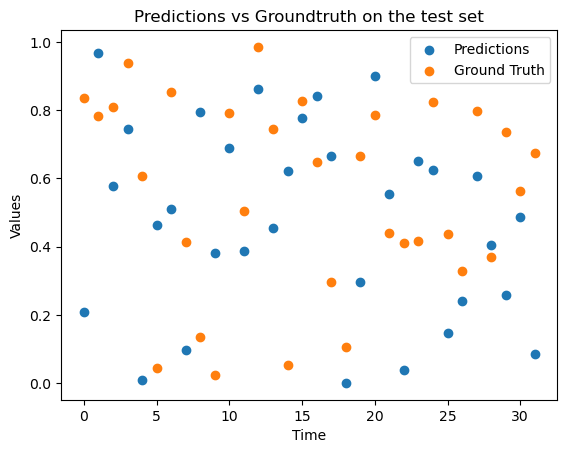

In [144]:
import numpy as np
import matplotlib.pyplot as plt


t = np.arange(0, 32)
predictions_test = np.random.rand(32)  # Replace with your predictions
y_test = np.random.rand(32)  # Replace with your ground truth


if len(t) != len(predictions_test):
    raise ValueError("x and y must be the same size")


fig, ax = plt.subplots()
plt.scatter(t, predictions_test, label="Predictions")
plt.scatter(t, y_test, label="Ground Truth")


plt.title("Predictions vs Groundtruth on the test set")
plt.xlabel("Time")
plt.ylabel("Values")

plt.legend()

plt.show()

